# Unit10 Case Study: Spam Classification<a name="Top"></a>

<span style="color:black; font-size: 1.3em;">MSDS7333-4023

<span style="color:black; font-size: 1.3em;">7/23/2018

<span style="color:black; font-size: 1.3em;">Mooyoung Lee

### <span style="color:skyblue">Please use hyperlinks !
    
# Table of Contents<a name="toc"></a>


1. [Introduction](#introduction)
2. [Data](#data)
3. [Background](#Background)
4. [Evaluation Metrix](#eval)
5. [Method](#method)
6. [Results](#Result)
7. [Conclusion](#Conclusion)
8. [Reference Code](#code)


# Introduction <a name="introduction"></a>

<span style="color:black; font-size: 1.3em;"> **The objective of this study is to compare the performance of multiple classification algorithms in classifying emails as spam or ham.**

<span style="color:black; font-size: 1.3em;"> Spam corpus data from Spam Assassin website is used for both model training and evaluation.  **Naive Bayes, CART, and XGBoost models were used to classify spam emails and compare the performance metrix.**

<span style="color:black; font-size: 1.3em;"> **Extra attention was paid to the sampling method** between simple random sampling(SRS) and stratified sampling(STR) since the corpus data amounts were not balanced.  **Statistical tests are performed to see if there is a difference in classification performance with two different sampling methods.**  

<span style="color:black; font-size: 1.3em;"> The first Naive Bayes model utilized only a Bag of Words(BOW) from email body text.  The later CART and XGBoost models were used [29 features](#variable) that are consist of email metadata and simple text mining data. The log likelihood ratio found from the first Naive Bayes model is added to the 29 features to run a XGBoost model to improve performance.  



[Back to top](#toc)

# Data <a name='data'></a>

<span style="color:black; font-size: 1.3em;">The original source of the spam corpus is SpamAssassin website. 5 corpus directories were existing, ['easy_ham' 'easy_ham_2' 'hard_ham' 'spam' 'spam_2'].  The word 'ham' represent non-spam emails.  The number of emails in each directory were 5051, 1400, 500, 1000, and 1397 accordingly. The name of the corpus folder indicated that there are some difference in the contents among folders.  <span style="color:blue">**Only 7.1%(=500/6951) of non-spam emails were belong to 'hard_ham' corpus and 92.8% of the non-spam emails were belong to 'easy_ham'.**</span>  If the 'hard_ham' contains very distinct data compared to 'easy_ham', then stratified sampling is a better sampling scheme than drawing SRS sample from a flattened group containing all 'ham'.


<span style="color:black; font-size: 1.3em;">For the Naive Bayes mode, only the email body texts are processed to determine the probabilies of being a spam. The body text is cleaned by removing punctuations and stopwords. Processes of data extraction from email and cleaning to create features are borrowed from the textbook listed below.   


<span style="color:black; font-size: 1.3em;">For the CART and XGBoost models, 29 features are used.  The code to generate all the 29 features are reused from textbook. The details of features are shown on the below table. 



**TextBook**: Chapter 3 from ["Data Science in R A Case Studies Approach to Computational Reasoning and Problem Solving"](http://rdatasciencecases.org/)

**Textbook data**: [SpamAssasin Corpus](http://www.rdatasciencecases.org/Spam/)

**Original data source**: [SpamAssassin](http://spamassassin.apache.org)

[Back to top](#toc)

# <h3 align='center'>Variable Definition Table</h3><a name="variable"></a>


|Variable |Type |Definition|
|------------------------|---------------------------|-----------------------------|
|isRe |logical |TRUE if Re: appears at the start of the subject.|
|numLines |integer |Number of lines in the body of the message.|
|bodyCharCt |integer |Number of characters in the body of the message.|
|underscore |logical |TRUE if email address in the From field of the header contains an underscore.|
|subExcCt |integer |Number of exclamation marks in the subject.|
|subQuesCt |integer |Number of question marks in the subject.|
|numAtt |integer |Number of attachments in the message.|
|priority |logical |TRUE if a Priority key is present in the header.|
|numRec |numeric |Number of recipients of the message, including CCs.|
|perCaps |numeric |Percentage of capitals among all letters in the message body, excluding attachments.|
|isInReplyTo |logical |TRUE if the In-Reply-To key is present in the header.|
|sortedRec |logical |TRUE if the recipients’ email addresses are sorted.|
|subPunc |logical |TRUE if words in the subject have punctuation or numbers embedded in them, e.g., w!se.|
|hour |numeric |Hour of the day in the Date field.|
|multipartText |logical |TRUE if the MIME type is multipart/text.|
|hasImages |logical |TRUE if the message contains images.|
|isPGPsigned |logical |TRUE if the message contains a PGP signature.|
|perHTML |numeric |Percentage of characters in HTML tags in the message body in comparison to all characters.|
|subSpamWords |logical |TRUE if the subject contains one of the words in a spam word vector.|
|subBlanks |numeric |Percentage of blanks in the subject.|
|noHost |logical |TRUE if there is no hostname in the Message-Id key in the header.|
|numEnd |logical |TRUE if the email sender’s address (before the @) ends in a number.|
|isYelling |logical |TRUE if the subject is all capital letters.|
|forwards |numeric |Number of forward symbols in a line of the body, e.g.,>>> xxx contains 3 forwards.|
|isOrigMsg |logical |TRUE if the message body contains the phrase original message.|
|isDear |logical |TRUE if the message body contains the word dear.|
|isWrote |logical |TRUE if the message contains the phrase wrote:.|
|avgWordLen |numeric |The average length of the words in a message.|
|numDlr |numeric |Number of dollar signs in the message body.|

[Go back](#introduction)

# Background  <a name='Background'></a>

## **Naive Bayes :**

<span style="color:black; font-size: 1.3em;"> Naive Bayes classifier use a bag of word. A bag of word can be created from train data set using all email recordings.  The order of word is not considered so it is called Naive.  It only counts the frequency of the word and use the frequency to calculate the likelihood of being spam.  Applying log to the likelyhood of being spam changes product process into sum while providing a better statistical property [Textbook].  Therefore, the log-likelyhood-ratio(LLR) is used to calculate the probabilities of being spam.  


## **CART :**

<span style="color:black; font-size: 1.3em;"> CART represent Classification And Regression Tree. It is a decision tree based algorithm that can be used both classification and regression. [More Info](https://en.wikipedia.org/wiki/Predictive_analytics#Classification_and_regression_trees_.28CART.29)

## **XGBoost :**

<span style="color:black; font-size: 1.3em;"> XGBoost is a gradient boosted decision trees that is focused on computational speed and model performance. [Three main component of XGBoost are gradient boosting algorithm, stochastic gradient boosting, and regularized gradient boosting.](https://machinelearningmastery.com/gentle-introduction-xgboost-applied-machine-learning/)  Gradient boosting can be controlled by the learning rate.  Stochastic gradient boosting is related to the hyperparameters such as sub-sampling and column split levels.  L1 and L2 are the regularization inputs. 

[Back to top](#toc)

# Evaluation Metrics  <a name='eval'></a>

<span style="color:black; font-size: 1.3em;"> For spam classification task, false positive rate should be minimized because the cost to label regular emails as spam and lose the communications will be high.  The cost to the false negative which is allowing to receive some spam email will be acceptable comparing to the cost of losing regular emails.  Thus, **Type I Error or Precision should be the primary interest for the implementation of a spam classification model.**  

<span style="color:black; font-size: 1.3em;"> However, Type I Error can become zero by adjusting a model hyperparameter (e.g. Tau-value for log-odd-ratio) with having a large Type II Error.  Therefore, **F1 score or Accuracy values have to be used to compare the performance of models during a model selection stage.**  Accuracy is an ratio of correct prediction.  F1-score is an weighted average of recall and precision.  **F1-score is better than Accuracy for our application** since the distribution of class(Spam:Ham ~ 1:2) is not even and also the cost of false positive and false negatives are different.  


<span style="color:black; font-size: 1.3em;"> Belows are the equations for evaluation metrics. These metrics will be calculated for every classifier to make sure all other metrics are reasonable beside the F1-score, the metrics to choose a final classifier. 

$$Precision = \frac{TP}{TP+FP}$$<br>
$$Recall = \frac{TP}{TP+FN}$$<br>
$$F1 = \frac{2*Precision*Recall}{Precision+Recall}$$<br>
$$Accuracy = \frac{TP+TN}{TP+FP+TN+FN}$$<br>
$$Type I Error = \frac{FP}{FP+TN}$$<br>
$$Type II Error = \frac{FN}{FN+TP}$$<br>

*Where,* 
> *TP = True Positive,*<br>
  *FP = False Positive,*<br>
  *TN = True Negative,*<br> 
  *FN = False Negative.*<br>
        
        
[Equation Reference](https://en.wikipedia.org/wiki/Precision_and_recall)<br>
[Metrics Applications 1](https://towardsdatascience.com/accuracy-precision-recall-or-f1-331fb37c5cb9)
[Metrics Applications 2](http://blog.exsilio.com/all/accuracy-precision-recall-f1-score-interpretation-of-performance-measures/)

[Back to top](#toc)

# Method <a name='method'></a>

**1. Naive Bayes Model**

- <span style="color:black; font-size: 1.3em;">[Log-likelyhood-ratio example](#tau) shows the effect of Type I and II errors by selecting tau-value.
- <span style="color:black; font-size: 1.3em;">Naive Bayes models are compared with SRS and Stratified samplings.  The train and test data sets are splited with 66% and 33% accordingly.  For each sampling scheme, modeling and performance evaluation process is repeated 10 times.  
- <span style="color:black; font-size: 1.3em;">[A function](#str) is wrote to draw SRS and Stratify samples.
- <span style="color:black; font-size: 1.3em;">[A function](#fun_naive) is generated to iteratively model and collect performance metrics. Tau value is set to have Type I error not greater than 0.01.
- <span style="color:black; font-size: 1.3em;">[T-test](#ttest) is performed to check the mean difference in LLR statistics and performance metrics.
- <span style="color:black; font-size: 1.3em;">[Classifier performance](#eval_naive) outputs are generated. k-fold cross-validation is not used for this model.  Instead, 10-time random samples are used to evaluate.  
    
**2. CART**

- <span style="color:black; font-size: 1.3em;">[CART model](#cart) is generated using rpart library method and the cp parameter, which helps to prune trees, is optimized using caret library. The range of cp parameter search was 0 to 0.01 by 0.0005 increment.  3-fold cross-validation is used for this process.
    
**3. XGBoost**

- <span style="color:black; font-size: 1.3em;">[XGBoost model](#xg) is also optimized using the caret library.  Below parameters values are used to find the best combination to yield the best F1 score. 3-fold cross-validation is used for this process.
    
     - nrounds = c(100,150,200), 
     - max_depth = c(7,9,11,13), 
     - eta = c(0.01,0.1,0.3), 
     - gamma=c(0,1,3), 
     - min_child_weight=c(1,3,5)
     
**4. XGBoost w/ additional LLR feature**

- <span style="color:black; font-size: 1.3em;">The LLR model is generated only based on the training data set. Then the LLR values for the test and train data sets are calculated using the LLR model.  
- <span style="color:black; font-size: 1.3em;">The LLR value is added as a new feature for each train and test data sets that originally include 29 features. Thus, the final train/test sets had 30 features at the end.
- <span style="color:black; font-size: 1.3em;">[XGBoost model](#xgllr) was generated using the total 30 input features. 
- <span style="color:black; font-size: 1.3em;">3-fold cross-validation is performed.


[Back to top](#toc)

# Result <a name="Result"></a>

<span style="color:black; font-size: 1.3em;">The [t-test](#ttest) showed that there is no significant difference in LLR distribution statistics and model performance metrics. 

<span style="color:black; font-size: 1.3em;">The [performance metrics of all four classifiers](#resultAll) are compared.  The highest F1 score, 0.986, was acheived by XGBoost model without LLR.  The second highest F1 score was from XGBoost model with additional LLR feature.  The Naive Bayes and CART models showed F1 score of 0.963 and 0.960 accordingly, which is 2% behind XGBoost models.  XGBoost w/ additional LLR feature showed the lowest Type I and Type II errors.  

[Back to top](#toc)

# Conclusion<a name="Conclusion"></a>

<span style="color:black; font-size: 1.3em;">Even though the corpus data recordings are not balanced and also contains differnet difficulties to detect as spam, <span style="color:blue">there was no significant evidence (w/ 0.05 of alpha value) to change the Naive Bayes model performance by changing sampling scheme from SRS to Statified.</span>  Thus, the rest of the model evaluation was done with SRS samples without stratification by the source folders.  

<span style="color:black; font-size: 1.3em;">XGBoost classifier showed higher F1 score by 0.02 than the Naive Bayes and CART models.  <span style="color:blue">By adding Log-Likelyhood-Ratio(LLR) feature into the XGBoost model, the precision, accuracy, and Type I and II errors become superior than any other models.</span> 

<span style="color:black; font-size: 1.3em;">To control the spam emails, precision need to be higher or Type I error has to be very low.  The XGBoost model with LLR feature gives 0.003 of Type I error.  This means that 3 non-spam emails out of a thousand non-spam email will be falsely classified as spam.  Those 3 email will go into a spam folder and the recipient may never see the email.  0.003 of Type I error value was the lowest error rate among other models and while providing the lowest Type II error.  However,  <span style="color:blue">the decision to implement this model should be made carefully by considering the cost of false positive rate to the business that is adopting this model.  

[Back to top](#toc)

# Reference Code <a name="code"></a>

[Back to top](#toc)

# Step1-A: Data Preperation for Naive Bayes Classification


## Working directory structure

Place all spam directories under the 'messages' directory to make easy to reproduce.

In [1]:
spamPath = "./"
list.dirs(spamPath, full.names = FALSE)

[1] ""                    ".ipynb_checkpoints"  "Data"               
[4] "messages"            "messages/easy_ham"   "messages/easy_ham_2"
[7] "messages/hard_ham"   "messages/spam"       "messages/spam_2"

## 5 different spam corpus directories are used

In [2]:
list.files(path = paste(spamPath, "messages", sep = .Platform$file.sep))

[1] "easy_ham"   "easy_ham_2" "hard_ham"   "spam"       "spam_2"

## The email recordings are named with a number and MD5 checksum value that is generated using the contents of each email.

In [3]:
head(list.files(path = paste(spamPath,'messages', 'spam', sep=.Platform$file.sep)))

[1] "00001.7848dde101aa985090474a91ec93fcf0"
[2] "00002.d94f1b97e48ed3b553b3508d116e6a09"
[3] "00003.2ee33bc6eacdb11f38d052c44819ba6c"
[4] "00004.eac8de8d759b7e74154f142194282724"
[5] "00005.57696a39d7d84318ce497886896bf90d"
[6] "00006.5ab5620d3d7c6c0db76234556a16f6c1"

## Number of files

### corpus directory may contain extra system log files so the actual recordings are one or two less than the file count.

In [4]:
dirNames = list.files(path = paste(spamPath, "messages", 
                      sep = .Platform$file.sep))

cat('Total number of all corpus data :\n')
length(list.files(paste(spamPath, "messages", dirNames, 
                        sep = .Platform$file.sep)))

cat('\n\nNumber of each corpus data :\n')
sapply(paste(spamPath, "messages", dirNames, 
             sep = .Platform$file.sep), 
       function(dir) length(list.files(dir)) )

fullDirNames = paste(spamPath, "messages", dirNames, 
                     sep = .Platform$file.sep)

Total number of all corpus data :


[1] 9353



Number of each corpus data :


.//messages/easy_ham .//messages/easy_ham_2   .//messages/hard_ham 
                  5052                   1401                    501 
      .//messages/spam     .//messages/spam_2 
                  1001                   1398

## Functions to convert body text into odd ratio using Naive Bayes

In [5]:
splitMessage = function(msg) {
  splitPoint = match("", msg)
  header = msg[1:(splitPoint-1)]
  body = msg[ -(1:splitPoint) ]
  return(list(header = header, body = body))
}

getBoundary = function(header) {
  boundaryIdx = grep("boundary=", header)
  boundary = gsub('"', "", header[boundaryIdx])
  gsub(".*boundary= *([^;]*);?.*", "\\1", boundary)
}

dropAttach = function(body, boundary){
  
  bString = paste("--", boundary, sep = "")
  bStringLocs = which(bString == body)
  
  if (length(bStringLocs) <= 1) return(body)
  
  eString = paste("--", boundary, "--", sep = "")
  eStringLoc = which(eString == body)
  if (length(eStringLoc) == 0) 
    return(body[ (bStringLocs[1] + 1) : (bStringLocs[2] - 1)])
  
  n = length(body)
  if (eStringLoc < n) 
     return( body[ c( (bStringLocs[1] + 1) : (bStringLocs[2] - 1), 
                    ( (eStringLoc + 1) : n )) ] )
  
  return( body[ (bStringLocs[1] + 1) : (bStringLocs[2] - 1) ])
}

library(tm)
stopWords = stopwords()
cleanSW = tolower(gsub("[[:punct:]0-9[:blank:]]+", " ", stopWords))
SWords = unlist(strsplit(cleanSW, "[[:blank:]]+"))
SWords = SWords[ nchar(SWords) > 1 ]
stopWords = unique(SWords)

cleanText =
function(msg)   {
  tolower(gsub("[[:punct:]0-9[:space:][:blank:]]+", " ", msg))
}

findMsgWords = 
function(msg, stopWords) {
 if(is.null(msg))
  return(character())

 words = unique(unlist(strsplit(cleanText(msg), "[[:blank:]\t]+")))
 
 # drop empty and 1 letter words
 words = words[ nchar(words) > 1]
 words = words[ !( words %in% stopWords) ]
 invisible(words)
}


processAllWords = function(dirName, stopWords)
{
       # read all files in the directory
  fileNames = list.files(dirName, full.names = TRUE)
       # drop files that are not email, i.e., cmds
  notEmail = grep("cmds$", fileNames)
  if ( length(notEmail) > 0) fileNames = fileNames[ - notEmail ]

  messages = lapply(fileNames, readLines, encoding = "latin1")
  
       # split header and body
  emailSplit = lapply(messages, splitMessage)
       # put body and header in own lists
  bodyList = lapply(emailSplit, function(msg) msg$body)
  headerList = lapply(emailSplit, function(msg) msg$header)
  rm(emailSplit)
  
       # determine which messages have attachments
  hasAttach = sapply(headerList, function(header) {
    CTloc = grep("Content-Type", header)
    if (length(CTloc) == 0) return(0)
    multi = grep("multi", tolower(header[CTloc])) 
    if (length(multi) == 0) return(0)
    multi
  })
  
  hasAttach = which(hasAttach > 0)
  
       # find boundary strings for messages with attachments
  boundaries = sapply(headerList[hasAttach], getBoundary)
  
       # drop attachments from message body
  bodyList[hasAttach] = mapply(dropAttach, bodyList[hasAttach], 
                               boundaries, SIMPLIFY = FALSE)
  
       # extract words from body
  msgWordsList = lapply(bodyList, findMsgWords, stopWords)
  
  invisible(msgWordsList)
}


Loading required package: NLP


In [6]:
msgWordsList = lapply(fullDirNames, processAllWords, 
                      stopWords = stopWords) 

numMsgs = sapply(msgWordsList, length)
cat('Number of messages in each directory:\n',numMsgs)

Warning message in FUN(X[[i]], ...):
"incomplete final line found on './/messages/hard_ham/00228.0eaef7857bbbf3ebf5edbbdae2b30493'"Warning message in FUN(X[[i]], ...):
"incomplete final line found on './/messages/hard_ham/0231.7c6cc716ce3f3bfad7130dd3c8d7b072'"Warning message in FUN(X[[i]], ...):
"incomplete final line found on './/messages/hard_ham/0250.7c6cc716ce3f3bfad7130dd3c8d7b072'"Warning message in FUN(X[[i]], ...):
"incomplete final line found on './/messages/spam/00136.faa39d8e816c70f23b4bb8758d8a74f0'"Warning message in FUN(X[[i]], ...):
"incomplete final line found on './/messages/spam/0143.260a940290dcb61f9327b224a368d4af'"

Number of messages in each directory:
 5051 1400 500 1000 1397

## Assign Spam Label

In [7]:
isSpam = rep(c(FALSE, FALSE, FALSE, TRUE, TRUE), numMsgs)  # label Spam and Ham by the folder names
numFolder = rep(c(1,2,3,4,5), numMsgs)   # label folder numbers for stratification sampling purpose

msgWordsList = unlist(msgWordsList, recursive = FALSE)

## Function: Train/Test data split w/ SRS or Folder-Stratification<a name="str"></a>

[Back to top](#method)

In [8]:
train_test_split = function(msgWordsList = msgWordsList, stratify = FALSE, test_size = 3, random_state = 418910){
    
    # stratify[True] will sample data from each folder proportionally to their recording size
    # stratify[False] will samlple data from the combined Spam and Ham folders. 
    # test_size is the denominator of total recordings.  For example, 3 means 1/3 of all data will be used for testing.
    # random_state is the seed number
    
    set.seed(random_state)
    numEmail = length(isSpam)
    numSpam = sum(isSpam)
    numHam = numEmail - numSpam
    numSpamTest = numSpam/test_size
    numHamTest = numHam/test_size
    
    if (stratify == FALSE){
        
        # SRS sample from each Spam and Ham groups  
        testSpamIdx = sample(numSpam, size = floor(numSpamTest))
        testHamIdx = sample(numHam, size = floor(numHamTest))

        testMsgWords = c((msgWordsList[isSpam])[testSpamIdx],
                         (msgWordsList[!isSpam])[testHamIdx] )
        trainMsgWords = c((msgWordsList[isSpam])[ - testSpamIdx], 
                          (msgWordsList[!isSpam])[ - testHamIdx])

        testIsSpam = rep(c(TRUE, FALSE), 
                         c(length(testSpamIdx), length(testHamIdx)))
        trainIsSpam = rep(c(TRUE, FALSE), 
                         c(numSpam - length(testSpamIdx), 
                           numHam - length(testHamIdx)))
    }else{
        # Stratified sample from each corpus folder (5-folder in this case)
        numTestEachFolder = floor(c(numMsgs[1:3]/numHam*numHamTest, numMsgs[4:5]/numSpam*numSpamTest))
        testID_eachFolder = mapply(sample, numMsgs, numTestEachFolder)    # sample numbers for each folder
        numFolderCumsum = c(0,cumsum(numMsgs)[1:4])                       # cumulative sum of each folder total recordings
        
        testID = unlist(sapply(1:5, function(x) testID_eachFolder[[x]]+numFolderCumsum[x]))   # test sample numbers
        testMsgWords = msgWordsList[testID]
        trainMsgWords = msgWordsList[- testID]   
        testIsSpam = isSpam[testID]
        trainIsSpam = isSpam[- testID]   
    }
    
    return(list(testMsgWords, trainMsgWords, testIsSpam, trainIsSpam))
}

## Functions to compute Log Odd ratio

In [9]:
computeFreqs =
function(wordsList, spam, bow = unique(unlist(wordsList)))
{
   # create a matrix for spam, ham, and log odds
  wordTable = matrix(0.5, nrow = 4, ncol = length(bow), 
                     dimnames = list(c("spam", "ham", 
                                        "presentLogOdds", 
                                        "absentLogOdds"),  bow))

   # For each spam message, add 1 to counts for words in message
  counts.spam = table(unlist(lapply(wordsList[spam], unique)))
  wordTable["spam", names(counts.spam)] = counts.spam + .5

   # Similarly for ham messages
  counts.ham = table(unlist(lapply(wordsList[!spam], unique)))  
  wordTable["ham", names(counts.ham)] = counts.ham + .5  


   # Find the total number of spam and ham
  numSpam = sum(spam)
  numHam = length(spam) - numSpam

   # Prob(word|spam) and Prob(word | ham)
  wordTable["spam", ] = wordTable["spam", ]/(numSpam + .5)
  wordTable["ham", ] = wordTable["ham", ]/(numHam + .5)
  
   # log odds
  wordTable["presentLogOdds", ] = 
     log(wordTable["spam",]) - log(wordTable["ham", ])
  wordTable["absentLogOdds", ] = 
     log((1 - wordTable["spam", ])) - log((1 -wordTable["ham", ]))

  invisible(wordTable)
}

computeMsgLLR = function(words, freqTable) 
{
       # Discards words not in training data.
  words = words[!is.na(match(words, colnames(freqTable)))]

       # Find which words are present
  present = colnames(freqTable) %in% words

  sum(freqTable["presentLogOdds", present]) +
    sum(freqTable["absentLogOdds", !present])
}

typeIErrorRate = 
function(tau, llrVals, spam)
{
  classify = llrVals > tau
  sum(classify & !spam)/sum(!spam)
}

typeIErrorRates = 
function(llrVals, isSpam) 
{
  o = order(llrVals)
  llrVals =  llrVals[o]
  isSpam = isSpam[o]

  idx = which(!isSpam)
  N = length(idx)
  list(error = (N:1)/N, values = llrVals[idx])
}

## Eval Metrix Function

Below MLmetrics outputs were not matching w/ theoreticall equations so a function to calculate evaulation metrics are generated.

library(MLmetrics)<br>
f1_val <- F1_Score(y_pred = data$pred, y_true = data$obs, positive = lev[1])<br>
p <- Precision(y_pred = data$pred, y_true = data$obs, positive = lev[1])<br>
r <- Recall(y_pred = data$pred, y_true = data$obs, positive = lev[1])

In [10]:
metrics = function(y_pred, y_true, tau){
    tp = sum(y_pred ==1 & y_true ==1)
    fp = sum(y_pred ==1 & y_true ==0)
    tn = sum(y_pred ==0 & y_true ==0)
    fn = sum(y_pred ==0 & y_true ==1)
    
    precision = tp/(tp+fp)
    recall = tp/(tp+fn)
    f1 = 2*precision*recall/(precision+recall)
    accuracy = (tp+tn)/(tp+fp+tn+fn)
    
    # Type I&II Errors (Dr.Slater)
    t1e<-fp/(fp+tn)
    t2e<-fn/(fn+tp)
    
    return(data.frame(Precision = precision, Recall = recall, 
                      F1 = f1, Accuracy = accuracy, 
                      Type_I_Error = t1e, Type_II_Error = t2e,
                     Tau = tau))
}

# Relation of Type I and II Errors w/ Tau value <a name="tau"></a>


## <span style="color:blue">Below plot shows that the Type I error can be decreased while Type II error increase as the tau value moves from left to right. 
    
[Back to top](#method)

In [11]:
trainTestSplit = train_test_split(msgWordsList = msgWordsList, stratify = FALSE, test_size = 3)

testMsgWords = trainTestSplit[[1]]
trainMsgWords = trainTestSplit[[2]]
testIsSpam = trainTestSplit[[3]]
trainIsSpam = trainTestSplit[[4]]

# Log Likelihood Ratio w/ Naive Bayes
trainTable = computeFreqs(trainMsgWords, trainIsSpam)
testLLR = sapply(testMsgWords, computeMsgLLR, trainTable)


In [12]:
trainLLR = sapply(trainMsgWords, computeMsgLLR, trainTable)

In [13]:
typeIErrorRates = function(llrVals, isSpam) {
    o = order(llrVals)
    llrVals =  llrVals[o]
    isSpam = isSpam[o]

    idx = which(!isSpam)
    N = length(idx)
    list(error = (N:1)/N, values = llrVals[idx])
}

typeIIErrorRates = function(llrVals, isSpam) {
    
    o = order(llrVals)
    llrVals =  llrVals[o]
    isSpam = isSpam[o]

    idx = which(isSpam)
    N = length(idx)
    list(error = (1:(N))/N, values = llrVals[idx])
}  

xI = typeIErrorRates(testLLR, testIsSpam)
xII = typeIIErrorRates(testLLR, testIsSpam)
tau01 = round(min(xI$values[xI$error <= 0.01]))
t2 = max(xII$error[ xII$values < tau01 ])

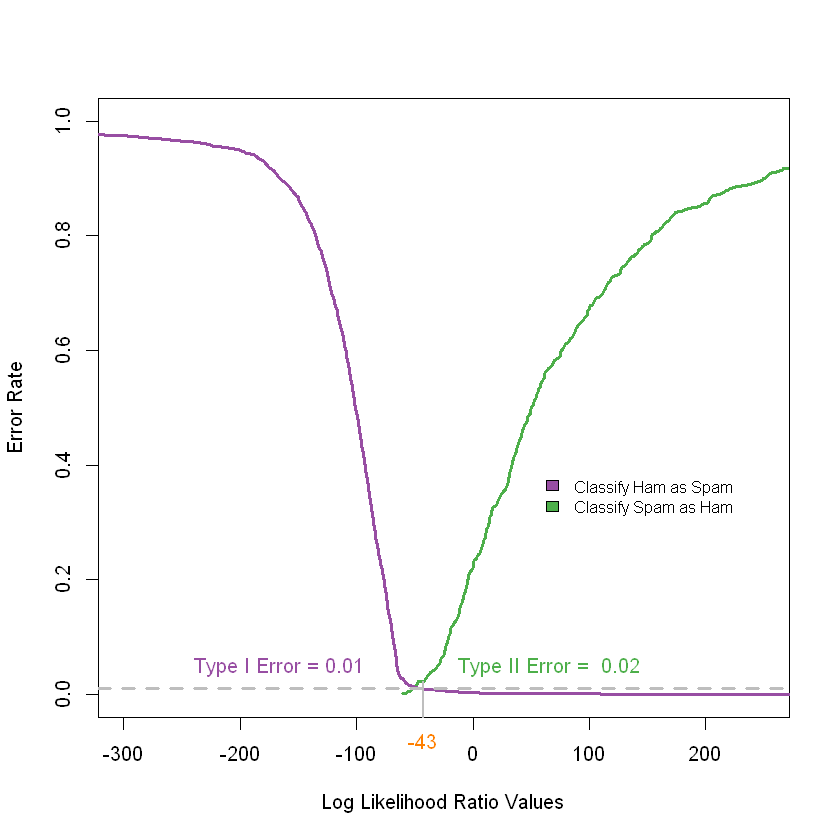

In [14]:
library(RColorBrewer)
cols = brewer.pal(9, "Set1")[c(3, 4, 5)]
plot(xII$error ~ xII$values,  type = "l", col = cols[1], lwd = 3,
     xlim = c(-300, 250), ylim = c(0, 1),
     xlab = "Log Likelihood Ratio Values", ylab="Error Rate")
points(xI$error ~ xI$values, type = "l", col = cols[2], lwd = 3)
legend(x = 50, y = 0.4, fill = c(cols[2], cols[1]),
       legend = c("Classify Ham as Spam", 
                  "Classify Spam as Ham"), cex = 0.8,
       bty = "n")
abline(h=0.01, col ="grey", lwd = 3, lty = 2)
text(-250, 0.05, pos = 4, "Type I Error = 0.01", col = cols[2])

mtext(tau01, side = 1, line = 0.5, at = tau01, col = cols[3])
segments(x0 = tau01, y0 = -.50, x1 = tau01, y1 = t2, 
         lwd = 2, col = "grey")
text(tau01 + 20, 0.05, pos = 4,
     paste("Type II Error = ", round(t2, digits = 2)), 
     col = cols[1])

# Naive Bayes Training and Testing (x10 iteration) <a name="fun_naive"></a>

[Back to top](#method)

In [15]:
TrainTest10 = function(stratify = FALSE){
for (i in 1:10){
    # Train/Test sample number split
    trainTestSplit = train_test_split(msgWordsList = msgWordsList, stratify = stratify, test_size = 3, random_state = i)

    testMsgWords = trainTestSplit[[1]]
    trainMsgWords = trainTestSplit[[2]]
    testIsSpam = trainTestSplit[[3]]
    trainIsSpam = trainTestSplit[[4]]

    # Log Likelihood Ratio w/ Naive Bayes
    trainTable = computeFreqs(trainMsgWords, trainIsSpam)
    testLLR = sapply(testMsgWords, computeMsgLLR, trainTable)

    # Summary of Log Ratio for Ham and Spam
    LLR_summary = tapply(testLLR, testIsSpam, summary)


    # determine Tau; Set to max allowable Type 1 error rate as 1%
    xI = typeIErrorRates(testLLR, testIsSpam)
    xII = typeIIErrorRates(testLLR, testIsSpam)
    tau = round(min(xI$values[xI$error <= 0.01]))
    
    # Prediction values
    y_pred = testLLR > tau

    # Evalueation Metricx
    Eval_Metrics = metrics(y_pred, testIsSpam, tau)

    # Output collection for 10 iterations
    if (i==1){
        LLR_summary_TRUE = LLR_summary$'TRUE'
        LLR_summary_FALSE = LLR_summary$'FALSE'
        Metrics = Eval_Metrics
        }else{
            LLR_summary_TRUE = rbind(LLR_summary_TRUE, LLR_summary$'TRUE')
            LLR_summary_FALSE = rbind(LLR_summary_FALSE, LLR_summary$'FALSE')
            Metrics = rbind(Metrics, Eval_Metrics)
        }
    }
    
    return(list(LLR_summary_TRUE, LLR_summary_FALSE, Metrics))
}
    

In [16]:
Result_SRS = TrainTest10(stratify = FALSE)
Result_STR = TrainTest10(stratify = TRUE)

# Simple Random Sample into Naive Bayes <a name="Result_SRS"></a>

[Back to top](#method)

In [17]:
Result_SRS

,Min.,1st Qu.,Median,Mean,3rd Qu.,Max.
LLR_summary_TRUE,-80.10191,-4.90272881,41.87438,99.88098,122.7432,4583.167
,-79.90948,-3.37990119,42.36449,106.76617,127.6823,4619.376
,-67.85804,11.93074908,52.94551,143.66126,129.7910,23494.327
,-64.47736,0.07749401,49.63625,131.62484,124.3412,23534.333
,-72.82860,-5.81229965,38.26452,94.70565,110.9181,3469.296
,-209.00863,5.72272453,50.03919,125.57868,121.2183,23538.402
,-219.06962,0.97213669,46.89009,134.67741,123.5320,23532.423
,-67.25014,0.37288960,48.68154,122.90621,123.7185,23591.940
,-73.89127,-4.51361330,40.92245,96.49177,114.9617,4627.187
,-68.16454,-2.76284266,40.76886,103.73217,117.9462,3393.786


# Stratified Sample into Naive Bayes <a name="Result_STR></a>

[Back to top](#method)

In [18]:
Result_STR

,Min.,1st Qu.,Median,Mean,3rd Qu.,Max.
LLR_summary_TRUE,-64.83709,15.0726805,59.07358,119.50210,135.2279,4649.010
,-85.51464,-7.4732290,42.23265,87.96905,120.3682,1075.130
,-186.16040,8.1291441,50.53009,143.45602,128.2131,23481.197
,-68.28194,8.5755695,56.37585,151.47235,137.1026,23544.162
,-60.36812,13.1555625,57.90939,110.04449,132.6392,3560.873
,-191.76304,-0.7838034,50.91973,105.70637,127.3404,4630.565
,-66.13492,0.5222096,45.51293,104.15367,125.6264,3591.619
,-77.28183,1.6182141,45.16942,107.31890,126.3658,4551.144
,-67.07898,7.0466481,53.08017,132.48405,133.1050,23477.631
,-82.89271,-9.4357976,37.91926,95.30955,112.5865,4672.140


# Independent t-test <a name="ttest"></a>

[Back to Method](#method)

[Back to Result](#Result)

## t-test w/ LLR statistics for spam emails between SRS and Stratified 

In [19]:
ttest_LLR_TRUE = sapply(1:6, function(x) t.test(Result_SRS[[1]][,x], Result_STR[[1]][,x], alpha=0.05))
colnames(ttest_LLR_TRUE) = c('Min.','1st Qu.','Median','Mean','3rd Qu.','Max.')
ttest_LLR_TRUE

,Min.,1st Qu.,Median,Mean,3rd Qu.,Max.
statistic,-0.2107331,-1.239668,-1.699614,0.03024803,-2.096873,0.9288854
parameter,17.43035,15.74501,16.20618,17.57633,16.94718,17.919
p.value,0.8355395,0.2332577,0.1083136,0.9762101,0.05131808,0.3652933
conf.int,"-57.43389, 46.98471","-10.502775, 2.758257","-10.407011, 1.139852","-17.88881, 18.41053","-12.38409544, 0.03957233","-5195.284, 13425.437"
estimate,"-100.25596, -95.03137","-0.2295392, 3.6427199","45.23873, 49.87231","116.0025, 115.7417","121.6852, 127.8575","13838.424, 9723.347"
null.value,0,0,0,0,0,0
alternative,two.sided,two.sided,two.sided,two.sided,two.sided,two.sided
method,Welch Two Sample t-test,Welch Two Sample t-test,Welch Two Sample t-test,Welch Two Sample t-test,Welch Two Sample t-test,Welch Two Sample t-test
data.name,"Result_SRS[[1]][, x] and Result_STR[[1]][, x]","Result_SRS[[1]][, x] and Result_STR[[1]][, x]","Result_SRS[[1]][, x] and Result_STR[[1]][, x]","Result_SRS[[1]][, x] and Result_STR[[1]][, x]","Result_SRS[[1]][, x] and Result_STR[[1]][, x]","Result_SRS[[1]][, x] and Result_STR[[1]][, x]"


## t-test w/ LLR statistics for ham(non-spam) emails between SRS and Stratified 

In [20]:
ttest_LLR_FALSE = sapply(1:6, function(x) t.test(Result_SRS[[2]][,x], Result_STR[[2]][,x], alpha=0.05))
colnames(ttest_LLR_FALSE) = c('Min.','1st Qu.','Median','Mean','3rd Qu.','Max.')
ttest_LLR_FALSE

,Min.,1st Qu.,Median,Mean,3rd Qu.,Max.
statistic,0.2489318,-0.5210641,-1.021098,-0.7848173,-1.055579,0.4265713
parameter,16.5414,12.5294,13.51201,13.52562,15.22834,17.18175
p.value,0.8064781,0.611408,0.3251428,0.4460899,0.3076202,0.6749884
conf.int,"-206.5245, 261.6461","-6.515635, 3.991153","-7.821697, 2.787797","-6.931179, 3.226517","-8.111659, 2.733625","-211.5246, 318.8429"
estimate,"-982.517, -1010.078","-132.6235, -131.3612","-106.3027, -103.7857","-122.4643, -120.6120","-86.43244, -83.74343","275.1053, 221.4461"
null.value,0,0,0,0,0,0
alternative,two.sided,two.sided,two.sided,two.sided,two.sided,two.sided
method,Welch Two Sample t-test,Welch Two Sample t-test,Welch Two Sample t-test,Welch Two Sample t-test,Welch Two Sample t-test,Welch Two Sample t-test
data.name,"Result_SRS[[2]][, x] and Result_STR[[2]][, x]","Result_SRS[[2]][, x] and Result_STR[[2]][, x]","Result_SRS[[2]][, x] and Result_STR[[2]][, x]","Result_SRS[[2]][, x] and Result_STR[[2]][, x]","Result_SRS[[2]][, x] and Result_STR[[2]][, x]","Result_SRS[[2]][, x] and Result_STR[[2]][, x]"


## t-test w/ evaluation metrics between SRS and Stratified 

In [21]:
ttest_metrics = sapply(1:7, function(x) t.test(Result_SRS[[3]][,x], Result_STR[[3]][,x], alpha=0.05))
colnames(ttest_metrics) = c('Precision', 'Recall', 'F1', 'Accuracy','Type_I_Error','Type_II_Error','Tau')
ttest_metrics

,Precision,Recall,F1,Accuracy,Type_I_Error,Type_II_Error,Tau
statistic,2.386749,0.410984,0.5274041,0.5257885,-2.218921,-0.410984,-0.7618766
parameter,17.99998,16.60962,16.62666,16.81568,17.14343,16.60962,17.93871
p.value,0.02818236,0.686338,0.60488,0.6059003,0.0402691,0.686338,0.4560344
conf.int,"0.0001853436, 0.0029100128","-0.02152665, 0.03191903","-0.01061803, 0.01767970","-0.005093135, 0.008470520","-9.425972e-04, -2.405827e-05","-0.03191903, 0.02152665","-12.402184, 5.802184"
estimate,"0.9720394, 0.9704917","0.9534418, 0.9482456","0.9625231, 0.9589923","0.9810334, 0.9793447","0.009451877, 0.009935205","0.04655820, 0.05175439","-41.2, -37.9"
null.value,0,0,0,0,0,0,0
alternative,two.sided,two.sided,two.sided,two.sided,two.sided,two.sided,two.sided
method,Welch Two Sample t-test,Welch Two Sample t-test,Welch Two Sample t-test,Welch Two Sample t-test,Welch Two Sample t-test,Welch Two Sample t-test,Welch Two Sample t-test
data.name,"Result_SRS[[3]][, x] and Result_STR[[3]][, x]","Result_SRS[[3]][, x] and Result_STR[[3]][, x]","Result_SRS[[3]][, x] and Result_STR[[3]][, x]","Result_SRS[[3]][, x] and Result_STR[[3]][, x]","Result_SRS[[3]][, x] and Result_STR[[3]][, x]","Result_SRS[[3]][, x] and Result_STR[[3]][, x]","Result_SRS[[3]][, x] and Result_STR[[3]][, x]"


# Classifier Performance: Naive Bayes Model  <a name="eval_naive"></a>

[Back to top](#method)

# Average performance output w/ SRS Sampling

In [22]:
avg_metrics = cbind(apply(Result_SRS[[3]], 2, mean), apply(Result_SRS[[3]], 2, sd))
colnames(avg_metrics) = c('Mean','StDev')
round(avg_metrics,3)

,Mean,StDev
Precision,0.972,0.001
Recall,0.953,0.024
F1,0.963,0.013
Accuracy,0.981,0.006
Type_I_Error,0.009,0.000
Type_II_Error,0.047,0.024
Tau,-41.200,9.964


# Average performance output w/ Stratified Sampling

In [23]:
avg_metrics = cbind(apply(Result_STR[[3]], 2, mean), apply(Result_STR[[3]], 2, sd))
colnames(avg_metrics) = c('Mean','StDev')
round(avg_metrics,3)

,Mean,StDev
Precision,0.970,0.001
Recall,0.948,0.032
F1,0.959,0.017
Accuracy,0.979,0.008
Type_I_Error,0.010,0.001
Type_II_Error,0.052,0.032
Tau,-37.900,9.398


# CART model example via rpart

In [24]:
processAttach = function(body, contentType){

  n = length(body)
  boundary = getBoundary(contentType)
 
  bString = paste("--", boundary, sep = "")
  bStringLocs = which(bString == body)
  eString = paste("--", boundary, "--", sep = "")
  eStringLoc = which(eString == body)
  
  if (length(eStringLoc) == 0) eStringLoc = n
  if (length(bStringLocs) <= 1) {
    attachLocs = NULL
    msgLastLine = n
    if (length(bStringLocs) == 0) bStringLocs = 0
  } else {
    attachLocs = c(bStringLocs[ -1 ],  eStringLoc)
    msgLastLine = bStringLocs[2] - 1
  }
  
  msg = body[ (bStringLocs[1] + 1) : msgLastLine] 
  if ( eStringLoc < n )
    msg = c(msg, body[ (eStringLoc + 1) : n ])
  
  if ( !is.null(attachLocs) ) {
    attachLens = diff(attachLocs, lag = 1) 
    attachTypes = mapply(function(begL, endL) {
      CTloc = grep("^[Cc]ontent-[Tt]ype", body[ (begL + 1) : (endL - 1)])
      if ( length(CTloc) == 0 ) {
        MIMEType = NA
      } else {
        CTval = body[ begL + CTloc[1] ]
        CTval = gsub('"', "", CTval )
        MIMEType = sub(" *[Cc]ontent-[Tt]ype: *([^;]*);?.*", "\\1", CTval)   
      }
      return(MIMEType)
    }, attachLocs[-length(attachLocs)], attachLocs[-1])
  }
  
  if (is.null(attachLocs)) return(list(body = msg, attachDF = NULL) )
  return(list(body = msg, 
             attachDF = data.frame(aLen = attachLens, 
                                     aType = unlist(attachTypes),
                                     stringsAsFactors = FALSE)))                                
}                       

readEmail = function(dirName) {
       # retrieve the names of files in directory
  fileNames = list.files(dirName, full.names = TRUE)
       # drop files that are not email
  notEmail = grep("cmds$", fileNames)
  if ( length(notEmail) > 0) fileNames = fileNames[ - notEmail ]

       # read all files in the directory
  lapply(fileNames, readLines, encoding = "latin1")
}


processAllEmail = function(dirName, isSpam = FALSE)
{
       # read all files in the directory
  messages = readEmail(dirName)
  fileNames = names(messages)
  n = length(messages)
  
       # split header from body
  eSplit = lapply(messages, splitMessage)
  rm(messages)

       # process header as named character vector
  headerList = lapply(eSplit, function(msg) 
                                 processHeader(msg$header))
  
       # extract content-type key
  contentTypes = sapply(headerList, function(header) 
                                       header["Content-Type"])
  
       # extract the body
  bodyList = lapply(eSplit, function(msg) msg$body)
  rm(eSplit)

       # which email have attachments
  hasAttach = grep("^ *multi", tolower(contentTypes))

       # get summary stats for attachments and the shorter body
  attList = mapply(processAttach, bodyList[hasAttach], 
                   contentTypes[hasAttach], SIMPLIFY = FALSE)
  
  bodyList[hasAttach] = lapply(attList, function(attEl) 
                                           attEl$body)
 
  attachInfo = vector("list", length = n )
  attachInfo[ hasAttach ] = lapply(attList, 
                                  function(attEl) attEl$attachDF)
 
       # prepare return structure
  emailList = mapply(function(header, body, attach, isSpam) {
                       list(isSpam = isSpam, header = header, 
                            body = body, attach = attach)
                     },
                     headerList, bodyList, attachInfo, 
                     rep(isSpam, n), SIMPLIFY = FALSE )
  names(emailList) = fileNames
  
  invisible(emailList)
}
                                   
processHeader = function(header)
{
       # modify the first line to create a key:value pair
  header[1] = sub("^From", "Top-From:", header[1])
  
  headerMat = read.dcf(textConnection(header), all = TRUE)
  headerVec = unlist(headerMat)
  
  dupKeys = sapply(headerMat, function(x) length(unlist(x)))
  names(headerVec) = rep(colnames(headerMat), dupKeys)
  
  return(headerVec)
}
                   
SpamCheckWords =
  c("viagra", "pounds", "free", "weight", "guarantee", "million", 
    "dollars", "credit", "risk", "prescription", "generic", "drug",
    "financial", "save", "dollar", "erotic", "million", "barrister",
    "beneficiary", "easy", 
    "money back", "money", "credit card")


getMessageRecipients =
  function(header)
  {
    c(if("To" %in% names(header))  header[["To"]] else character(0),
      if("Cc" %in% names(header))  header[["Cc"]] else character(0),
      if("Bcc" %in% names(header)) header[["Bcc"]] else character(0)
    )
  }

In [25]:
funcList = list(
  isSpam =
    expression(msg$isSpam)
  ,
  isRe =
    function(msg) {
      # Can have a Fwd: Re:  ... but we are not looking for this here.
      # We may want to look at In-Reply-To field.
      "Subject" %in% names(msg$header) && 
        length(grep("^[ \t]*Re:", msg$header[["Subject"]])) > 0
    }
  ,
  numLines =
    function(msg) length(msg$body)
  ,
  bodyCharCt =
    function(msg)
      sum(nchar(msg$body))
  ,
  underscore =
    function(msg) {
      if(!"Reply-To" %in% names(msg$header))
        return(FALSE)
      
      txt <- msg$header[["Reply-To"]]
      length(grep("_", txt)) > 0  && 
        length(grep("[0-9A-Za-z]+", txt)) > 0
    }
  ,
  subExcCt = 
    function(msg) {
      x = msg$header["Subject"]
      if(length(x) == 0 || sum(nchar(x)) == 0 || is.na(x))
        return(NA)
      
      sum(nchar(gsub("[^!]","", x)))
    }
  ,
  subQuesCt =
    function(msg) {
      x = msg$header["Subject"]
      if(length(x) == 0 || sum(nchar(x)) == 0 || is.na(x))
        return(NA)
      
      sum(nchar(gsub("[^?]","", x)))
    }
  ,
  numAtt = 
    function(msg) {
      if (is.null(msg$attach)) return(0)
      else nrow(msg$attach)
    }
   
  ,
  priority =
    function(msg) {
      ans <- FALSE
      # Look for names X-Priority, Priority, X-Msmail-Priority
      # Look for high any where in the value
      ind = grep("priority", tolower(names(msg$header)))
      if (length(ind) > 0)  {
        ans <- length(grep("high", tolower(msg$header[ind]))) >0
      }
      ans
    }
  ,
  numRec =
    function(msg) {
      # unique or not.
      els = getMessageRecipients(msg$header)
      
      if(length(els) == 0)
        return(NA)
      
      # Split each line by ","  and in each of these elements, look for
      # the @ sign. This handles
      tmp = sapply(strsplit(els, ","), function(x) grep("@", x))
      sum(sapply(tmp, length))
    }
  ,
  perCaps =
    function(msg)
    {
      body = paste(msg$body, collapse = "")
      
      # Return NA if the body of the message is "empty"
      if(length(body) == 0 || nchar(body) == 0) return(NA)
      
      # Eliminate non-alpha characters and empty lines 
      body = gsub("[^[:alpha:]]", "", body)
      els = unlist(strsplit(body, ""))
      ctCap = sum(els %in% LETTERS)
      100 * ctCap / length(els)
    }
  ,
  isInReplyTo =
    function(msg)
    {
      "In-Reply-To" %in% names(msg$header)
    }
  ,
  sortedRec =
    function(msg)
    {
      ids = getMessageRecipients(msg$header)
      all(sort(ids) == ids)
    }
  ,
  subPunc =
    function(msg)
    {
      if("Subject" %in% names(msg$header)) {
        el = gsub("['/.:@-]", "", msg$header["Subject"])
        length(grep("[A-Za-z][[:punct:]]+[A-Za-z]", el)) > 0
      }
      else
        FALSE
    },
  hour =
    function(msg)
    {
      date = msg$header["Date"]
      if ( is.null(date) ) return(NA)
      # Need to handle that there may be only one digit in the hour
      locate = regexpr("[0-2]?[0-9]:[0-5][0-9]:[0-5][0-9]", date)
      
      if (locate < 0)
        locate = regexpr("[0-2]?[0-9]:[0-5][0-9]", date)
      if (locate < 0) return(NA)
      
      hour = substring(date, locate, locate+1)
      hour = as.numeric(gsub(":", "", hour))
      
      locate = regexpr("PM", date)
      if (locate > 0) hour = hour + 12
      
      locate = regexpr("[+-][0-2][0-9]00", date)
      if (locate < 0) offset = 0
      else offset = as.numeric(substring(date, locate, locate + 2))
      (hour - offset) %% 24
    }
  ,
  multipartText =
    function(msg)
    {
      if (is.null(msg$attach)) return(FALSE)
      numAtt = nrow(msg$attach)
      
      types = 
        length(grep("(html|plain|text)", msg$attach$aType)) > (numAtt/2)
    }
  ,
  hasImages =
    function(msg)
    {
      if (is.null(msg$attach)) return(FALSE)
      
      length(grep("^ *image", tolower(msg$attach$aType))) > 0
    }
  ,
  isPGPsigned =
    function(msg)
    {
      if (is.null(msg$attach)) return(FALSE)
      
      length(grep("pgp", tolower(msg$attach$aType))) > 0
    },
  perHTML =
    function(msg)
    {
      if(! ("Content-Type" %in% names(msg$header))) return(0)
      
      el = tolower(msg$header["Content-Type"]) 
      if (length(grep("html", el)) == 0) return(0)
      
      els = gsub("[[:space:]]", "", msg$body)
      totchar = sum(nchar(els))
      totplain = sum(nchar(gsub("<[^<]+>", "", els )))
      100 * (totchar - totplain)/totchar
    },
  subSpamWords =
    function(msg)
    {
      if("Subject" %in% names(msg$header))
        length(grep(paste(SpamCheckWords, collapse = "|"), 
                    tolower(msg$header["Subject"]))) > 0
      else
        NA
    }
  ,
  subBlanks =
    function(msg)
    {
      if("Subject" %in% names(msg$header)) {
        x = msg$header["Subject"]
        # should we count blank subject line as 0 or 1 or NA?
        if (nchar(x) == 1) return(0)
        else 100 *(1 - (nchar(gsub("[[:blank:]]", "", x))/nchar(x)))
      } else NA
    }
  ,
  noHost =
    function(msg)
    {
      # Or use partial matching.
      idx = pmatch("Message-", names(msg$header))
      
      if(is.na(idx)) return(NA)
      
      tmp = msg$header[idx]
      return(length(grep(".*@[^[:space:]]+", tmp)) ==  0)
    }
  ,
  numEnd =
    function(msg)
    {
      # If we just do a grep("[0-9]@",  )
      # we get matches on messages that have a From something like
      # " \"marty66@aol.com\" <synjan@ecis.com>"
      # and the marty66 is the "user's name" not the login
      # So we can be more precise if we want.
      x = names(msg$header)
      if ( !( "From" %in% x) ) return(NA)
      login = gsub("^.*<", "", msg$header["From"])
      if ( is.null(login) ) 
        login = gsub("^.*<", "", msg$header["X-From"])
      if ( is.null(login) ) return(NA)
      login = strsplit(login, "@")[[1]][1]
      length(grep("[0-9]+$", login)) > 0
    },
  isYelling =
    function(msg)
    {
      if ( "Subject" %in% names(msg$header) ) {
        el = gsub("[^[:alpha:]]", "", msg$header["Subject"])
        if (nchar(el) > 0) nchar(gsub("[A-Z]", "", el)) < 1
        else FALSE
      }
      else
        NA
    },
  forwards =
    function(msg)
    {
      x = msg$body
      if(length(x) == 0 || sum(nchar(x)) == 0)
        return(NA)
      
      ans = length(grep("^[[:space:]]*>", x))
      100 * ans / length(x)
    },
  isOrigMsg =
    function(msg)
    {
      x = msg$body
      if(length(x) == 0) return(NA)
      
      length(grep("^[^[:alpha:]]*original[^[:alpha:]]+message[^[:alpha:]]*$", 
                  tolower(x) ) ) > 0
    },
  isDear =
    function(msg)
    {
      x = msg$body
      if(length(x) == 0) return(NA)
      
      length(grep("^[[:blank:]]*dear +(sir|madam)\\>", 
                  tolower(x))) > 0
    },
  isWrote =
    function(msg)
    {
      x = msg$body
      if(length(x) == 0) return(NA)
      
      length(grep("(wrote|schrieb|ecrit|escribe):", tolower(x) )) > 0
    },
  avgWordLen =
    function(msg)
    {
      txt = paste(msg$body, collapse = " ")
      if(length(txt) == 0 || sum(nchar(txt)) == 0) return(0)
      
      txt = gsub("[^[:alpha:]]", " ", txt)
      words = unlist(strsplit(txt, "[[:blank:]]+"))
      wordLens = nchar(words)
      mean(wordLens[ wordLens > 0 ])
    }
  ,
  numDlr =
    function(msg)
    {
      x = paste(msg$body, collapse = "")
      if(length(x) == 0 || sum(nchar(x)) == 0)
        return(NA)
      
      nchar(gsub("[^$]","", x))
    }
)

In [26]:
createDerivedDF =
function(email = emailStruct, operations = funcList, 
         verbose = FALSE)
{
  els = lapply(names(operations),
               function(id) {
                 if(verbose) print(id)
                 e = operations[[id]]
                 v = if(is.function(e)) 
                        sapply(email, e)
                      else 
                        sapply(email, function(msg) eval(e))
                 v
         })

   df = as.data.frame(els)
   names(df) = names(operations)
   invisible(df)
}

In [27]:
emailStruct = mapply(processAllEmail, fullDirNames,
                     isSpam = rep( c(FALSE, TRUE), 3:2))      
emailStruct = unlist(emailStruct, recursive = FALSE)


Warning message in FUN(X[[i]], ...):
"incomplete final line found on './/messages/hard_ham/00228.0eaef7857bbbf3ebf5edbbdae2b30493'"Warning message in FUN(X[[i]], ...):
"incomplete final line found on './/messages/hard_ham/0231.7c6cc716ce3f3bfad7130dd3c8d7b072'"Warning message in FUN(X[[i]], ...):
"incomplete final line found on './/messages/hard_ham/0250.7c6cc716ce3f3bfad7130dd3c8d7b072'"Warning message in FUN(X[[i]], ...):
"incomplete final line found on './/messages/spam/00136.faa39d8e816c70f23b4bb8758d8a74f0'"Warning message in FUN(X[[i]], ...):
"incomplete final line found on './/messages/spam/0143.260a940290dcb61f9327b224a368d4af'"

In [28]:
emailDF = createDerivedDF(emailStruct)
dim(emailDF)

[1] 9348   30

In [29]:
head(emailDF)

,isSpam,isRe,numLines,bodyCharCt,underscore,subExcCt,subQuesCt,numAtt,priority,numRec,...,subBlanks,noHost,numEnd,isYelling,forwards,isOrigMsg,isDear,isWrote,avgWordLen,numDlr
.//messages/easy_ham1,FALSE,TRUE,50,1554,FALSE,0,0,0,FALSE,2,...,12.50000,FALSE,FALSE,FALSE,0.000000,FALSE,FALSE,FALSE,4.376623,3
.//messages/easy_ham2,FALSE,FALSE,26,873,FALSE,0,0,0,FALSE,1,...,8.00000,FALSE,FALSE,FALSE,0.000000,FALSE,FALSE,FALSE,4.555556,0
.//messages/easy_ham3,FALSE,FALSE,38,1713,FALSE,0,0,0,FALSE,1,...,8.00000,FALSE,FALSE,FALSE,0.000000,FALSE,FALSE,FALSE,4.817164,0
.//messages/easy_ham4,FALSE,FALSE,32,1095,FALSE,0,0,0,FALSE,0,...,18.91892,FALSE,FALSE,FALSE,3.125000,FALSE,FALSE,FALSE,4.714286,0
.//messages/easy_ham5,FALSE,TRUE,31,1021,FALSE,0,0,0,FALSE,1,...,15.21739,FALSE,FALSE,FALSE,6.451613,FALSE,FALSE,FALSE,4.234940,0
.//messages/easy_ham6,FALSE,TRUE,25,718,FALSE,0,0,0,FALSE,1,...,15.21739,FALSE,FALSE,FALSE,12.000000,FALSE,FALSE,FALSE,3.956897,0


In [30]:
setupRpart = function(data) {
  logicalVars = which(sapply(data, is.logical))
  facVars = lapply(data[ , logicalVars], 
                   function(x) {
                      x = as.factor(x)
                      levels(x) = c("F", "T")
                      x
                   })
  cbind(facVars, data[ , - logicalVars])
}

emailDFrp = setupRpart(emailDF)

In [31]:
head(emailDFrp)

,isSpam,isRe,underscore,priority,isInReplyTo,sortedRec,subPunc,multipartText,hasImages,isPGPsigned,...,subQuesCt,numAtt,numRec,perCaps,hour,perHTML,subBlanks,forwards,avgWordLen,numDlr
.//messages/easy_ham1,F,T,F,F,T,T,F,F,F,F,...,0,0,2,4.451039,11,0,12.50000,0.000000,4.376623,3
.//messages/easy_ham2,F,F,F,F,F,T,F,F,F,F,...,0,0,1,7.491289,11,0,8.00000,0.000000,4.555556,0
.//messages/easy_ham3,F,F,F,F,F,T,F,F,F,F,...,0,0,1,7.436096,12,0,8.00000,0.000000,4.817164,0
.//messages/easy_ham4,F,F,F,F,F,T,F,F,F,F,...,0,0,0,5.090909,13,0,18.91892,3.125000,4.714286,0
.//messages/easy_ham5,F,T,F,F,F,T,F,F,F,F,...,0,0,1,6.116643,13,0,15.21739,6.451613,4.234940,0
.//messages/easy_ham6,F,T,F,F,T,T,F,F,F,F,...,0,0,1,7.625272,13,0,15.21739,12.000000,3.956897,0


## CART example data set

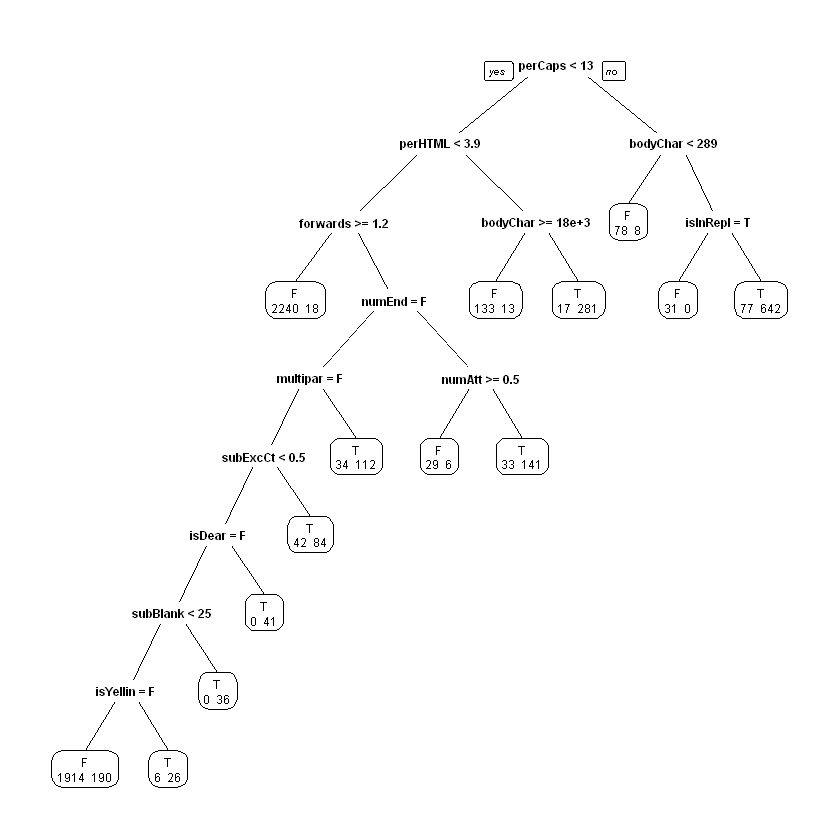

In [32]:
library(rpart)
library(rpart.plot)

# train/test data split
set.seed(418910)

numEmail = length(isSpam)
numSpam = sum(isSpam)
numHam = numEmail - numSpam

testSpamIdx = sample(numSpam, size = floor(numSpam/3))
testHamIdx = sample(numHam, size = floor(numHam/3))

testDF = 
  rbind( emailDFrp[ emailDFrp$isSpam == "T", ][testSpamIdx, ],
         emailDFrp[emailDFrp$isSpam == "F", ][testHamIdx, ] )
trainDF =
  rbind( emailDFrp[emailDFrp$isSpam == "T", ][-testSpamIdx, ], 
         emailDFrp[emailDFrp$isSpam == "F", ][-testHamIdx, ])

# train
rpartFit = rpart(isSpam ~ ., data = trainDF, method = "class")

# plot trained decision tree
prp(rpartFit, extra = 1)

# prediction
predictions = predict(rpartFit, 
       newdata = testDF[, names(testDF) != "isSpam"],
       type = "class")

## Preperation for model optimization

1. Change logical variables into numeric.
2. Replace NaNs to zero.

In [33]:
setupRnum = function(data) {
  logicalVars = which(sapply(data, is.logical))
  facVars = lapply(data[ , logicalVars], 
                   function(x) {
                      x = as.numeric(x)
                   })
  cbind(facVars, data[ , - logicalVars])
}

emailDFnum = setupRnum(emailDF)

emailDFnum[is.na(emailDFnum)]<-0

## Metrics function for Caret

In [34]:
library(MLmetrics)
f1 <- function(data, lev = NULL, model = NULL) {
    f1_val <- F1_Score(y_pred = data$pred, y_true = data$obs, positive = lev[1])
    p <- Precision(y_pred = data$pred, y_true = data$obs, positive = lev[1])
    r <- Recall(y_pred = data$pred, y_true = data$obs, positive = lev[1])
    a <- Accuracy(y_pred = data$pred, y_true = data$obs)
    fp <-sum(data$pred==1 & data$obs==0)
    fn <-sum(data$pred==0 & data$obs==1)
    tn <-sum(data$pred==0 & data$obs==0)
    tp <-sum(data$pred==1 & data$obs==1)
    t1e<-fp/(fp+tn)
    t2e<-fn/(fn+tp)
    c(F1 = f1_val,
    Precesion = p,
    Recall = r,
    Accuracy = a,
    Type_I_error=t1e,
    Type_II_error=t2e
   )
}


Attaching package: 'MLmetrics'

The following object is masked from 'package:base':

    Recall



# CART model: 3-fold CV w/ cp (pruning parameter) grid search<a name="cart"></a>

[Back to top](#method)

In [36]:
library(caret)
val<-seq(from = 0, to=0.01, by=0.0005)
cart_grid<-expand.grid(cp=val)
train_control<-trainControl(method="cv", number =3, savePredictions = 'final',summaryFunction = f1)
model_rpart<-caret::train(as.factor(isSpam) ~ .,data=emailDFnum, trControl = train_control, method='rpart',tuneGrid = cart_grid,
                         metric = 'F1')
model_rpart

Loading required package: lattice
Loading required package: ggplot2

Attaching package: 'ggplot2'

The following object is masked from 'package:NLP':

    annotate


Attaching package: 'caret'

The following objects are masked from 'package:MLmetrics':

    MAE, RMSE



CART 

9348 samples
  29 predictor
   2 classes: '0', '1' 

No pre-processing
Resampling: Cross-Validated (3 fold) 
Summary of sample sizes: 6232, 6232, 6232 
Resampling results across tuning parameters:

  cp      F1         Precesion  Recall     Accuracy   Type_I_error
  0.0000  0.9590466  0.9536237  0.9646094  0.9387035  0.03539059  
  0.0005  0.9601377  0.9544103  0.9660481  0.9403081  0.03395195  
  0.0010  0.9601851  0.9533877  0.9671990  0.9403081  0.03280104  
  0.0015  0.9597741  0.9525893  0.9671990  0.9396662  0.03280104  
  0.0020  0.9570529  0.9528863  0.9613005  0.9358151  0.03869947  
  0.0025  0.9560202  0.9508395  0.9613005  0.9342105  0.03869947  
  0.0030  0.9550755  0.9504394  0.9598619  0.9328199  0.04013811  
  0.0035  0.9528765  0.9527657  0.9532441  0.9298246  0.04675586  
  0.0040  0.9525112  0.9508208  0.9543951  0.9291827  0.04560495  
  0.0045  0.9526140  0.9502928  0.9551144  0.9292897  0.04488563  
  0.0050  0.9526140  0.9502928  0.9551144  0.9292897  0.04

# XGBoost model: 3-fold CV w/ a grid search <a name="xg"></a>

[Booster Parameter](https://www.hackerearth.com/practice/machine-learning/machine-learning-algorithms/beginners-tutorial-on-xgboost-parameter-tuning-r/tutorial/)

- nrounds[default=100]: similar to number of trees
- eta[default=0.3][range: (0,1)]: learning rate; the lower, the slower
- gamma[default=0][range: (0,Inf)]: prevent overfitting; the higher, the higher the regularization
- max_depth[default=6][range: (0,Inf)]: depth of tree
- min_child_weight[default=1][range:(0,Inf)]: prevent overfitting by stopping the tree splitting
- subsample[default=1][range: (0,1)]: controls the number of samples for each tree
- colsample_bytree[default=1][range: (0,1)]: controls the number of features to a tree
- lambda[default=0]: L2 regularization on wieghts
- alpha[default=1]: L1 regularization on weights

[Back to top](#method)

In [37]:
library(xgboost)
xgb_grid<-expand.grid(nrounds = c(100,150,200), max_depth = c(7,9,11,13), 
                      eta = c(0.01,0.1,0.3), gamma=c(0,1,3), 
                      min_child_weight=c(1,3,5),
                      colsample_bytree=1,  subsample=1)

train_control<-trainControl(method="cv", number=3, savePredictions = 'final',summaryFunction = f1)
model_xgb<-caret::train(as.factor(isSpam) ~ .,data=emailDFnum, trControl = train_control,method='xgbTree',tuneGrid = xgb_grid,
                       metric = 'F1')
model_xgb

eXtreme Gradient Boosting 

9348 samples
  29 predictor
   2 classes: '0', '1' 

No pre-processing
Resampling: Cross-Validated (3 fold) 
Summary of sample sizes: 6232, 6232, 6232 
Resampling results across tuning parameters:

  eta   max_depth  gamma  min_child_weight  nrounds  F1         Precesion
  0.01   7         0      1                 100      0.9569986  0.9410363
  0.01   7         0      1                 150      0.9592776  0.9461422
  0.01   7         0      1                 200      0.9612768  0.9494960
  0.01   7         0      3                 100      0.9563969  0.9397420
  0.01   7         0      3                 150      0.9585583  0.9442056
  0.01   7         0      3                 200      0.9608316  0.9479384
  0.01   7         0      5                 100      0.9552941  0.9381432
  0.01   7         0      5                 150      0.9567803  0.9410165
  0.01   7         0      5                 200      0.9588166  0.9449607
  0.01   7         1      1       

# XGBoost w/ Additional LLR Feature <a name="xgllr"></a>


[Back to top](#method)

In [38]:
# create k-fold index
set.seed(418910)
cv_folds <- createFolds(as.factor(emailDFnum$isSpam), k=3, list=TRUE, returnTrain = TRUE)
lengths(cv_folds)

Fold1 Fold2 Fold3 
 6232  6232  6232

In [39]:
# tokenized words from email body text
length(msgWordsList)

[1] 9348

In [40]:
# 29 features from email metadata and simple text mining
emailDFnum0 = setupRnum(emailDF)

dim(emailDFnum0)

[1] 9348   30

In [41]:
# 3-fold cross-validation

for (i in 1:3){

    # email text mining
    testMsgWords = msgWordsList[- cv_folds[[i]]]
    trainMsgWords = msgWordsList[cv_folds[[i]]]

    testIsSpam = isSpam[- cv_folds[[i]]]
    trainIsSpam = isSpam[cv_folds[[i]]]

    # Log Likelihood Ratio w/ Naive Bayes
    trainTable = computeFreqs(trainMsgWords, trainIsSpam)
    testLLR = sapply(testMsgWords, computeMsgLLR, trainTable)
    trainLLR = sapply(trainMsgWords, computeMsgLLR, trainTable)

    # email number features
    emailDFnumTest = emailDFnum0[- cv_folds[[i]],]
    emailDFnumTrain = emailDFnum0[cv_folds[[i]],]

    emailDFnumTest$LLR = testLLR
    emailDFnumTrain$LLR = trainLLR

    # replace NaNs with zeros
    emailDFnumTest[is.na(emailDFnumTest)]<-0
    emailDFnumTrain[is.na(emailDFnumTrain)]<-0

    # convert list to matrix
    emailDFnumTest = matrix(unlist(emailDFnumTest), ncol = 31, byrow=FALSE)
    emailDFnumTrain = matrix(unlist(emailDFnumTrain), ncol = 31, byrow=FALSE)

    # split label from data
    testX = emailDFnumTest[,-1]
    testY =  emailDFnumTest[,1]
    trainX = emailDFnumTrain[,-1]
    trainY =  emailDFnumTrain[,1]

    # training
    model_xgb <- xgboost(data = trainX, label = trainY, 
                   max_depth = 11, eta = 0.1,nrounds = 200,
                   objective = "binary:logistic")


    # predict
    pred <- predict(model_xgb, testX, objective='binary:logistics')   # prediction
    pred_y <- as.numeric(pred > 0.5)                                  # binary conversion


    # Output collection from iterations
    if (i==1){
        Metrics31 = metrics(pred_y, testY, 'NA')
        }else{
            Metrics31 = rbind(Metrics31, metrics(pred_y, testY, 'NA'))
        }
    }


[1]	train-error:0.004653 
[2]	train-error:0.005616 
[3]	train-error:0.004172 
[4]	train-error:0.004172 
[5]	train-error:0.004172 
[6]	train-error:0.004172 
[7]	train-error:0.004172 
[8]	train-error:0.003851 
[9]	train-error:0.003851 
[10]	train-error:0.003851 
[11]	train-error:0.003370 
[12]	train-error:0.003049 
[13]	train-error:0.003049 
[14]	train-error:0.002728 
[15]	train-error:0.002728 
[16]	train-error:0.001926 
[17]	train-error:0.002246 
[18]	train-error:0.001605 
[19]	train-error:0.001605 
[20]	train-error:0.001605 
[21]	train-error:0.001444 
[22]	train-error:0.001444 
[23]	train-error:0.001284 
[24]	train-error:0.001284 
[25]	train-error:0.000642 
[26]	train-error:0.000642 
[27]	train-error:0.000642 
[28]	train-error:0.000642 
[29]	train-error:0.000642 
[30]	train-error:0.000642 
[31]	train-error:0.000642 
[32]	train-error:0.000642 
[33]	train-error:0.000642 
[34]	train-error:0.000642 
[35]	train-error:0.000642 
[36]	train-error:0.000642 
[37]	train-error:0.000642 
[38]	train

# 3-fold cross-validation output

In [42]:
Metrics31[,-7]

Precision,Recall,F1,Accuracy,Type_I_Error,Type_II_Error
0.9924147,0.9824781,0.9874214,0.9935815,0.002589555,0.01752190
0.9811794,0.9787234,0.9799499,0.9897304,0.006473889,0.02127660
1.0000000,0.9737171,0.9866836,0.9932606,0.000000000,0.02628285


# Average output metrics

In [43]:
avg_metrics31 = cbind(apply(Metrics31[,-7], 2, mean), apply(Metrics31[,-7], 2, sd))
colnames(avg_metrics31) = c('Mean','StDev')
round(avg_metrics31,3)

,Mean,StDev
Precision,0.991,0.009
Recall,0.978,0.004
F1,0.985,0.004
Accuracy,0.992,0.002
Type_I_Error,0.003,0.003
Type_II_Error,0.022,0.004


# Performance of all models <a name="resultAll"></a>

[Back to Result](#Result)

In [44]:
performance = data.frame(
    F1 = c(0.963, 0.960, 0.986, 0.985),
    precision = c(0.972, 0.953, 0.982, 0.991),
    Recall = c(0.953, 0.967, 0.989, 0.978),
    Accuracy = c(0.981, 0.940, 0.978, 0.992),
    Type_I_Error = c(0.009, 0.033, 0.011, 0.003),
    Type_II_Error = c(0.047, 0.138, 0.054, 0.022)
)

rownames(performance) = c('Naïve_BOW', 'CART', 'XGBoost', 'XGBoost_BOW')
performance

,F1,precision,Recall,Accuracy,Type_I_Error,Type_II_Error
Naïve_BOW,0.963,0.972,0.953,0.981,0.009,0.047
CART,0.960,0.953,0.967,0.940,0.033,0.138
XGBoost,0.986,0.982,0.989,0.978,0.011,0.054
XGBoost_BOW,0.985,0.991,0.978,0.992,0.003,0.022
